In [1]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt

import model_based_agent as mba 
import worm_env as we 
import ensemble_mod_env as eme

from improc import *
import utils as ut
import tab_agents as tab
from datetime import datetime 

In [2]:
cam,task = init_instruments()
worm = we.ProcessedWorm(0,ep_len=10,ht_time=1e6)
worm.reset(cam,task)

array([0., 0.])

In [30]:
obss,rews,dones,infos = [],[],[],[]
for i in range(10):
    obs,rew,done,info = worm.step(0,cam,task)
    obss.append(obs)
    rews.append(rew)
    dones.append(done)
    infos.append(info)

In [31]:
infos

[{'loc': array([0., 0.]),
  't': 5.844000000040978,
  'endpts': array([[-1., -1.],
         [-1., -1.]]),
  'obs': array([0., 0.]),
  'reward': 0,
  'target': 90,
  'action': 0,
  'angs': array([0., 0.])},
 {'loc': array([0., 0.]),
  't': 6.032000000006519,
  'endpts': array([[-1., -1.],
         [-1., -1.]]),
  'obs': array([0., 0.]),
  'reward': 0,
  'target': 90,
  'action': 0,
  'angs': array([0., 0.])},
 {'loc': array([0., 0.]),
  't': 6.204000000027008,
  'endpts': array([[-1., -1.],
         [-1., -1.]]),
  'obs': array([0., 0.]),
  'reward': 0,
  'target': 90,
  'action': 0,
  'angs': array([0., 0.])},
 {'loc': array([0., 0.]),
  't': 6.39100000000326,
  'endpts': array([[-1., -1.],
         [-1., -1.]]),
  'obs': array([0., 0.]),
  'reward': 0,
  'target': 90,
  'action': 0,
  'angs': array([0., 0.])},
 {'loc': array([0., 0.]),
  't': 6.579000000027008,
  'endpts': array([[-1., -1.],
         [-1., -1.]]),
  'obs': array([0., 0.]),
  'reward': 0,
  'target': 90,
  'action': 0,

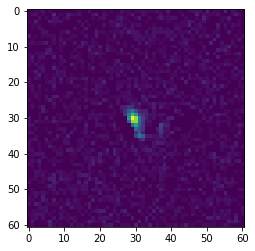

In [32]:
plt.imshow(infos[9]['img'])

In [33]:
infos[9]['angs']*180

array([  0., 150.])

In [35]:
infos[9]['obs']*180

array([30.,  0.])

In [34]:
infos[9]

{'img': array([[0, 0, 1, ..., 1, 0, 0],
        [0, 2, 2, ..., 3, 1, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 1, 2, ..., 3, 0, 0],
        [0, 3, 0, ..., 3, 1, 0],
        [0, 1, 0, ..., 0, 0, 0]], dtype=uint8),
 'loc': array([1054.375,  993.25 ]),
 't': 7.51600000000326,
 'endpts': array([[1053, 1056],
        [ 990,  998]]),
 'obs': array([0.16666667, 0.        ]),
 'reward': -0.049999999999954525,
 'target': 90,
 'action': 0,
 'angs': array([0.        , 0.83333333])}

In [34]:
info

{'img': array([[0, 0, 0, ..., 1, 0, 0],
        [1, 2, 2, ..., 0, 2, 2],
        [1, 3, 1, ..., 1, 0, 1],
        ...,
        [1, 0, 0, ..., 0, 0, 0],
        [1, 0, 2, ..., 1, 0, 0],
        [0, 1, 1, ..., 0, 0, 0]], dtype=uint8),
 'loc': array([885.66, 868.46]),
 't': 0.75,
 'endpts': array([[884, 883],
        [864, 881]]),
 'obs': array([ 30., -30.]),
 'reward': 0.2899999999999636,
 'target': 90,
 'action': 0,
 'angs': array([ 90, 240]),
 'scores': array([128103, 154175]),
 'body': 120}

In [25]:
templates,bodies = load_templates()

In [35]:
best_matches = find_angs(info['img'],[885,868],[885,860],templates)
info['scores'] = best_matches[0,:]
info['angs'] = best_matches[1,:]
info['endpts'] = best_matches[2:,:]
info['body'] = find_body(info,bodies)

In [36]:
info['body']

120

In [38]:
def get_vec(deg):
    return [np.cos(deg),np.sin(deg)]

res = [min(cv2.matchTemplate(info['img'],body,cv2.TM_SQDIFF).flatten()) for body in bodies]
deg = np.argmin(res) * DEG_INCR *pi/180 # to radians
end_ang = np.arctan2(-(info['endpts'][1,0] - info['endpts'][1,1]), info['endpts'][0,0] - info['endpts'][0,1])
                        # y1 - y0, x1 - x0
end_vec = get_vec(end_ang)
deg_vec0 = get_vec(deg)
deg_vec1 = get_vec(deg+pi)

# Returns 0 if original template is best. Returns 1 if need to add 180 deg
better_deg = np.argmax([proj(end_vec,deg_vec0),proj(end_vec,deg_vec1)])
round(deg*180/pi + 180*better_deg)

120

In [39]:
res

[2691739.0, 2257419.0, 2126811.0, 2193435.0, 2024926.0, 2238768.0]